In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv('D:/MKCE-20220504T065310Z-001/0.MKCE/Datasets/Social_Network_Ads.csv')

In [67]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [68]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [69]:
df.shape

(400, 5)

In [70]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [71]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

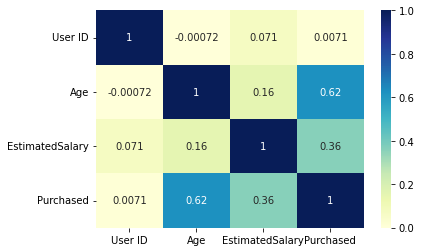

In [72]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [73]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [74]:
df.shape

(400, 5)

In [75]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [77]:
df2=pd.get_dummies(df)

In [78]:
df2

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [79]:
df2.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [80]:
Y=df2['Purchased']

X=df2[[ 'Age', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male']]

In [81]:
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,1,0
3,27.0,57000.0,1,0
4,19.0,76000.0,0,1
...,...,...,...,...
395,46.0,41000.0,1,0
396,51.0,23000.0,0,1
397,50.0,20000.0,1,0
398,36.0,33000.0,0,1


In [82]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [83]:
df2.shape

(400, 6)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 4)
(100, 4)
(300,)
(100,)


In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [87]:
#Fitting the model

from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=12)
cls.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=12)

In [88]:
#predicting

Y_pred=cls.predict(X_test)

In [89]:
cls.predict_proba(X_test)

array([[0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.3, 0.7],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. ,

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [91]:
print(accuracy_score(Y_test,Y_pred))

0.89


In [92]:
print(confusion_matrix(Y_test,Y_pred))

[[56  7]
 [ 4 33]]


In [93]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.82      0.89      0.86        37

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



In [94]:
#roc_curve nd roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [95]:
#Visualize

Y_proba=cls.predict_proba(X_test)

In [96]:
Y_proba

array([[0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.3, 0.7],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. ,

In [97]:
#we take predicted values of class1
Y_predicted=Y_proba[:,1]

In [98]:
print(Y_predicted)

[0.9 0.9 0.  0.  0.  0.  0.  1.  0.  0.6 0.  0.  0.7 0.  0.  0.9 0.  0.
 0.  0.  0.  0.  0.  0.5 0.  0.9 0.  0.9 0.  0.  0.8 0.  0.9 0.  0.  1.
 0.  0.  0.9 0.5 0.  0.  0.  0.  0.9 0.  0.1 0.9 1.  0.  1.  0.  1.  0.9
 0.9 1.  0.  0.9 0.  0.  0.9 0.6 0.4 1.  0.7 0.7 0.1 0.5 0.  0.  0.  0.8
 0.  0.  0.8 0.  0.9 0.9 0.  1.  0.  1.  0.  1.  0.  0.1 0.  1.  0.  0.
 1.  1.  0.7 1.  0.  0.7 0.9 0.  0.  0. ]


In [99]:
#use roc_curve() to generate fpr & tpr values

fpr,tpr,threshold=roc_curve(Y_test,Y_predicted)

In [100]:
#pass fpr nd tpr values to 


from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under curve for first model",roc_auc)

Area under curve for first model 0.9343629343629345


Text(0, 0.5, 'True positive rate (Sensitivity)')

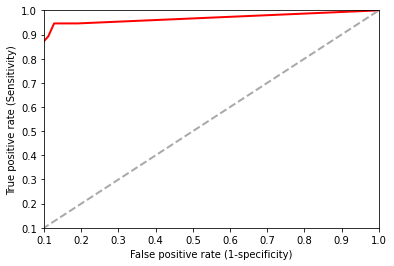

In [101]:
#plotting roc curve

plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label="ROC curve(area under curve=0.2%f)"%roc_auc)

plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.1,1.0])
plt.ylim([0.1,1.0])
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (Sensitivity)')